In [3]:
!pip install vaderSentiment


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\hp\Favorites\Downloads\X data.csv") 

# Display first few rows
df.head()



,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df.columns


Index(['clean_text', 'category'], dtype='object')

In [7]:
## Dataset Overview
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


clean_text    4
category      7
dtype: int64

In [8]:
# Convert tweet text to string and handle missing values
df['clean_text'] = df['clean_text'].astype(str)

In [9]:
## Sentiment Analysis Method
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(clean_text):
    score = analyzer.polarity_scores(clean_text)['compound']
    
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['clean_text'].apply(analyze_sentiment)


In [10]:
df[['clean_text', 'Sentiment']].head()


,clean_text,Sentiment
0,when modi promised “minimum government maximum...,Positive
1,talk all the nonsense and continue all the dra...,Negative
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Negative
4,answer who among these the most powerful world...,Positive


In [11]:
df['Sentiment'].value_counts()


Sentiment
Positive    76492
Negative    50776
Neutral     35712
Name: count, dtype: int64

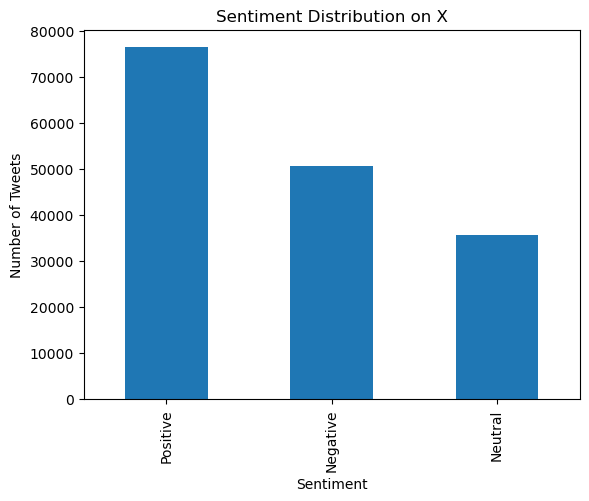

In [13]:
## Sentiment Distribution Visualization
#Bar Chart
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution on X")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


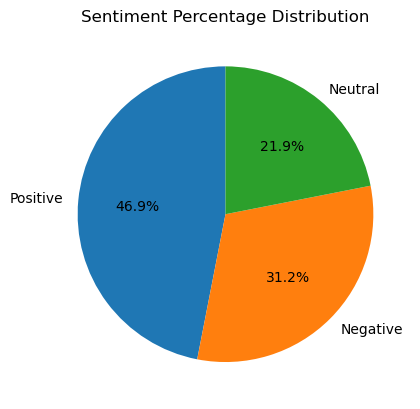

In [12]:
#Pie Chart
df['Sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sentiment Percentage Distribution")
plt.ylabel("")
plt.show()


In [32]:
pd.crosstab(df['category'], df['Sentiment'])


Sentiment,Negative,Neutral,Positive
category,,,
-1.0,21318,4400,9792
0.0,14643,22586,17984
1.0,14814,8723,48713
